
## Project Methodology Overview

### 1. Data Preparation and Initial Analysis

#### Data Loading and Exploration
- Loaded the fish dataset from a CSV file located in Google Drive
- Performed initial exploratory data analysis, including:
  - Displaying initial dataset characteristics
  - Visualizing class distribution through a bar plot
- Key features examined: pH, temperature, turbidity

### 2. Feature Engineering and Enhancement

#### Autoencoder-based Feature Extraction
- Implemented an autoencoder neural network for feature representation
- Steps:
  - Standardized input features using StandardScaler
  - Created an encoder-decoder architecture with:
    - Input layer
    - Dense layers with LeakyReLU activation
    - Latent space representation
- Extracted 5 latent features from the original dataset

#### Quantum Feature Extraction
- Utilized PennyLane quantum computing library
- Developed a quantum feature circuit with:
  - Rotation gates (RX, RY, RZ)
  - Controlled-NOT (CNOT) operation
- Applied quantum circuit to latent features
- Generated 2 quantum features using expectation values

### 3. Feature Processing and Dimensionality Reduction

#### Principal Component Analysis (PCA)
- Applied PCA to reduce latent features from 5 to 2 dimensions
- Preserved primary variance in the dataset
- Added reduced features back to the original dataset

### 4. Classification Approaches

#### Machine Learning Models Explored
- Without SMOTE (Standard Sampling):
  - Artificial Neural Network
  - k-Nearest Neighbor
  - Random Forest
  - Decision Tree
  - XGBoost
  - LightGBM
  - CatBoost

- With SMOTE (Synthetic Minority Over-sampling Technique):
  - Same set of models as above
  - Added balanced class representation
  - Improved performance on imbalanced datasets

#### Support Vector Machine (SVM) Classification
- Two variations tested:
  1. Without SMOTE
  2. With SMOTE
- Utilized RBF (Radial Basis Function) kernel
- Standardized features
- Evaluated using multiple metrics

### 5. Comprehensive Performance Evaluation

#### Metrics Analyzed
- Accuracy
- Recall
- Precision
- F1 Score
- Balanced Accuracy
- Matthews Correlation Coefficient
- AUC-ROC
- Log Loss
- Training Time
- Prediction Time

#### Visualization Techniques
- Confusion Matrices
- Feature Importance Plots
- Correlation Heatmaps

### 6. Advanced Analysis Techniques

#### Feature Importance
- Used techniques like:
  - Built-in feature importance for tree-based models
  - Permutation importance for other models
- Generated visualizations to understand feature contributions

#### SHAP (SHapley Additive exPlanations) Analysis
- Initiated for deeper model interpretability
- Helps understand feature impact on model predictions

### Summery
- Integrated quantum computing techniques in feature extraction
- Utilized autoencoder for latent feature representation
- Comprehensive model comparison with multiple evaluation metrics
- Advanced sampling technique (SMOTE) to handle class imbalance


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset from the mounted drive
file_path = '/content/drive/MyDrive/realfishdataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(df.head())

    ph  temperature  turbidity   fish
0  6.0         27.0        4.0  katla
1  7.6         28.0        5.9   sing
2  7.8         27.0        5.5   sing
3  6.5         31.0        5.5  katla
4  8.2         27.0        8.5  prawn


<ipython-input-5-9503d0a181fd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


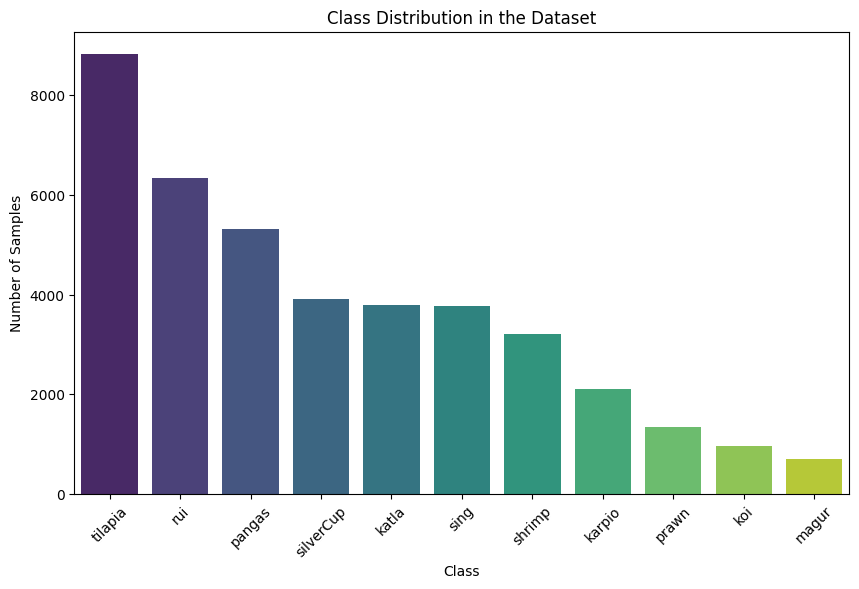

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the class distribution from the 'fish' column
class_distribution = df['fish'].value_counts()

# Create a bar plot for the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
!pip install pennylane
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pennylane as qml

# Load and prepare data
data = pd.read_csv('/content/drive/MyDrive/realfishdataset.csv')
features = data[['ph', 'temperature', 'turbidity']].values
target = data['fish'].values

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Encode target
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(target)

input_dim = features.shape[1]
latent_dim = 5  # Adjusted for data complexity

# Define autoencoder
input_layer = Input(shape=(input_dim,))
encoder_layer = Dense(32)(input_layer)
encoder_layer = LeakyReLU(alpha=0.1)(encoder_layer)
encoder_output = Dense(latent_dim, activation="relu")(encoder_layer)

decoder_layer = Dense(32, activation="relu")(encoder_output)
decoder_output = Dense(input_dim, activation="linear")(decoder_layer)

autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# Train autoencoder
batch_size = 64
epochs = 200
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(features, features, epochs=epochs, batch_size=batch_size, verbose=1)

# Extract latent features
encoder = Model(inputs=input_layer, outputs=encoder_output)
latent_features = encoder.predict(features)
print("Latent Features:\n", latent_features)

# Quantum feature extraction with PennyLane
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def quantum_feature_circuit(inputs):
    qml.RX(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.RZ(inputs[2], wires=0)
    qml.CNOT(wires=[0, 1])
    return [qml.expval(qml.PauliZ(i)) for i in range(2)]

# Apply quantum circuit to each latent feature
quantum_features = np.array([quantum_feature_circuit(f) for f in latent_features])

# Combine features and save
enhanced_data = np.hstack((features, latent_features, quantum_features, encoded_target.reshape(-1, 1)))
header = "ph,temperature,turbidity,latent1,latent2,latent3,latent4,latent5,quantum1,quantum2,fish_encoded"
np.savetxt("enhanced_data_with_quantum_features.csv", enhanced_data, delimiter=",", header=header, comments="")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.4 MB/s eta 0:00:00
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3809
Epoch 2/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2231e-04
Epoch 3/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1449e-04
Epoch 4/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0241e-04
Epoch 5/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6029e-04
Epoch 6/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2237e-04
Epoch 7/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1038e-04
Epoch 8/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4811e-05
Epoch 9/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2223e-05
Epoch 10/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7086e-05
Epoch 11/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.8790e-05
Epoch 12/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.1161e-05
Epoch 13/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.3124e-05
Epoch 14/200
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7560e-05
Epo

In [ ]:
import pandas as pd


file_path = '/content/enhanced_data_with_quantum_features.csv'


qd = pd.read_csv(file_path)


print(qd.head())

         ph  temperature  turbidity   latent1   latent2   latent3   latent4  \
0 -1.865602     1.092631  -0.217586  0.169399  2.357471  1.858349  1.013711   
1  0.107725     1.311196   0.673567  0.554919  0.789702  1.820896  0.332411   
2  0.354391     1.092631   0.485956  0.557833  0.563738  1.479429  0.317811   
3 -1.248938     1.966889   0.485956  0.331781  2.066403  2.653728  0.906879   
4  0.847722     1.092631   1.893040  1.551212  0.302658  2.410705  0.000000   

    latent5  quantum1  quantum2  fish_encoded  
0  0.942917  0.985686 -0.697875           1.0  
1  0.175446  0.849943  0.598409           9.0  
2  0.062857  0.848404  0.717125           9.0  
3  0.593228  0.945464 -0.449630           1.0  
4  0.560688  0.019583  0.018693           5.0  


Correlation Matrix:
                     ph  temperature  turbidity   latent1   latent2   latent3  \
ph            1.000000    -0.139823  -0.033706  0.459825 -0.935107 -0.179342   
temperature  -0.139823     1.000000   0.286978 -0.286098  0.245398  0.692168   
turbidity    -0.033706     0.286978   1.000000  0.642122  0.130345  0.854006   
latent1       0.459825    -0.286098   0.642122  1.000000 -0.279032  0.366816   
latent2      -0.935107     0.245398   0.130345 -0.279032  1.000000  0.358395   
latent3      -0.179342     0.692168   0.854006  0.366816  0.358395  1.000000   
latent4      -0.132442     0.581094  -0.223881 -0.227929  0.324968  0.247621   
latent5      -0.543944    -0.181626   0.652132  0.471080  0.589076  0.475264   
quantum1     -0.586637     0.335973  -0.423664 -0.906626  0.404921 -0.180917   
quantum2      0.253692     0.069556  -0.228304 -0.405556 -0.493283 -0.319192   
fish_encoded -0.039611    -0.141416  -0.180150 -0.118363  0.017093 -0.195653   

               lat

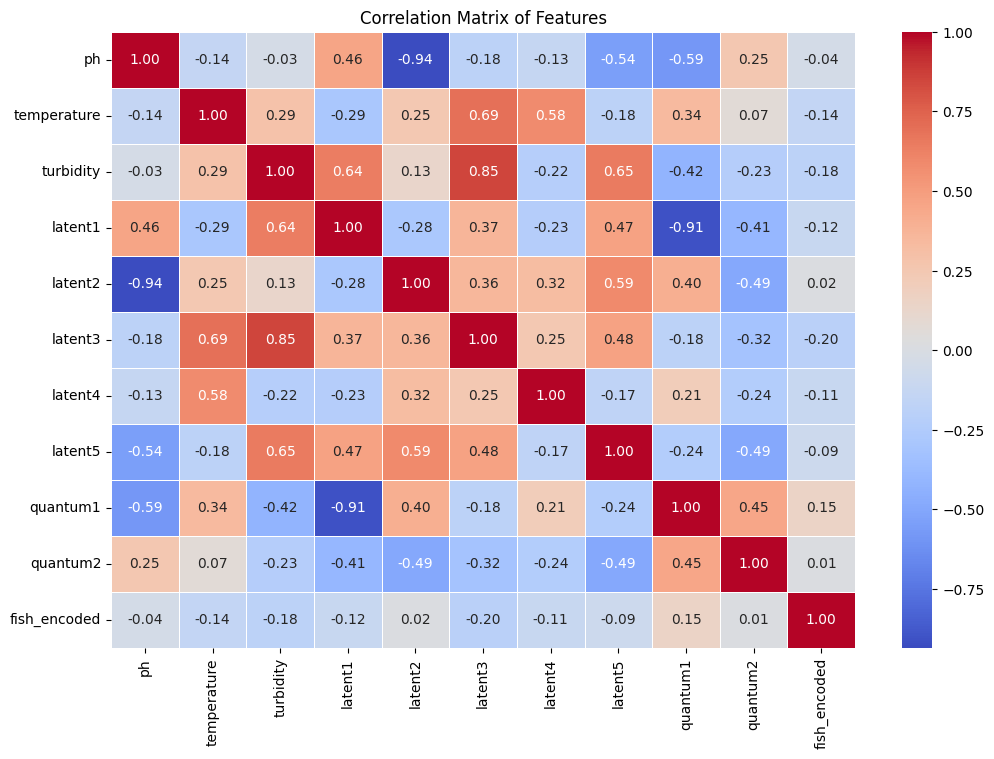

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



feature_names = ['ph', 'temperature', 'turbidity'] + [f'latent{i}' for i in range(1, 6)] + ['quantum1', 'quantum2']
enhanced_df = pd.DataFrame(qd, columns=feature_names + ['fish_encoded'])


correlation_matrix = enhanced_df.corr()


print("Correlation Matrix:\n", correlation_matrix)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
print(enhanced_df.columns)


Index(['ph', 'temperature', 'turbidity', 'latent1', 'latent2', 'latent3',
       'latent4', 'latent5', 'quantum1', 'quantum2', 'fish_encoded'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to latent features
latent_features = ['latent1', 'latent2', 'latent3', 'latent4', 'latent5']
pca = PCA(n_components=2)  # Reduce to 2 principal components
latent_pca = pca.fit_transform(enhanced_df[latent_features])

# Add the reduced features back to the dataset
enhanced_df['latent_pca1'] = latent_pca[:, 0]
enhanced_df['latent_pca2'] = latent_pca[:, 1]
output_path = '/content/drive/MyDrive/updated_data_with_pca.csv'
data.to_csv(output_path, index=False)


print(data.head())

    ph  temperature  turbidity   fish
0  6.0         27.0        4.0  katla
1  7.6         28.0        5.9   sing
2  7.8         27.0        5.5   sing
3  6.5         31.0        5.5  katla
4  8.2         27.0        8.5  prawn


In [ ]:
# Drop the original latent features

import pandas as pd


file_path = '/content/enhanced_data_with_quantum_features.csv'


qdl = pd.read_csv(file_path)


print(qdl.head())

         ph  temperature  turbidity   latent1   latent2   latent3   latent4  \
0 -1.865602     1.092631  -0.217586  0.169399  2.357471  1.858349  1.013711   
1  0.107725     1.311196   0.673567  0.554919  0.789702  1.820896  0.332411   
2  0.354391     1.092631   0.485956  0.557833  0.563738  1.479429  0.317811   
3 -1.248938     1.966889   0.485956  0.331781  2.066403  2.653728  0.906879   
4  0.847722     1.092631   1.893040  1.551212  0.302658  2.410705  0.000000   

    latent5  quantum1  quantum2  fish_encoded  
0  0.942917  0.985686 -0.697875           1.0  
1  0.175446  0.849943  0.598409           9.0  
2  0.062857  0.848404  0.717125           9.0  
3  0.593228  0.945464 -0.449630           1.0  
4  0.560688  0.019583  0.018693           5.0  


In [ ]:
latent_features = ['latent1', 'latent2', 'latent3', 'latent4', 'latent5']
qdl = qdl.drop(columns=latent_features)

# Save the updated dataset back to Google Drive
updated_file_path = '/content/drive/MyDrive/updated_data_without_latent_features.csv'
qdl.to_csv(updated_file_path, index=False)

# Print the first few rows to confirm the changes
print(qdl.head())

         ph  temperature  turbidity  quantum1  quantum2  fish_encoded
0 -1.865602     1.092631  -0.217586  0.985686 -0.697875           1.0
1  0.107725     1.311196   0.673567  0.849943  0.598409           9.0
2  0.354391     1.092631   0.485956  0.848404  0.717125           9.0
3 -1.248938     1.966889   0.485956  0.945464 -0.449630           1.0
4  0.847722     1.092631   1.893040  0.019583  0.018693           5.0


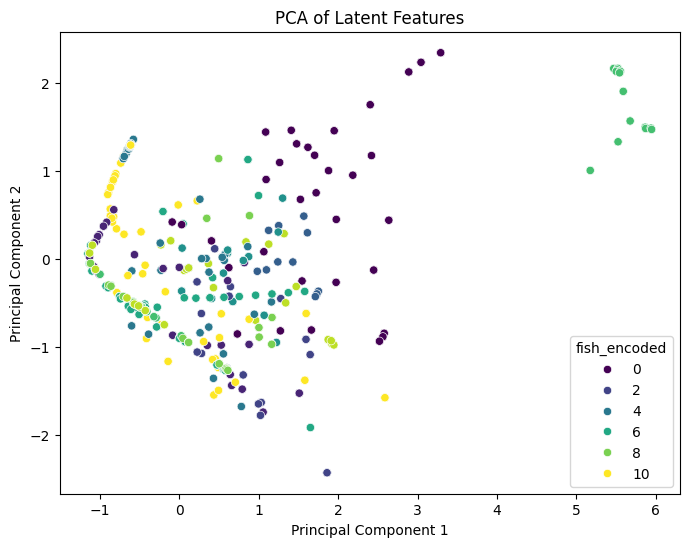

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'enhanced_df' contains your data with PCA components

# Scatter plot of PCA components colored by fish_encoded
plt.figure(figsize=(8, 6))
sns.scatterplot(x='latent_pca1', y='latent_pca2', hue='fish_encoded', data=enhanced_df, palette='viridis')
plt.title('PCA of Latent Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


without smote

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Load the data

X = enhanced_df[["ph",  "temperature", 'turbidity','latent1','latent2','latent3', 'latent4', 'latent5', 'quantum1', 'quantum2']]
y = enhanced_df['fish_encoded']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Artificial Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42),
    "k-Nearest Neighbour": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}




/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Function to calculate and display metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted')
    }
    return metrics

# Apply each model and collect results
results = {}
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = metrics

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:24:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1952
[LightGBM] [Info] Number of data points in the train set: 32224, number of used features: 10
[LightGBM] [Info] Start training from score -2.960487
[LightGBM] [Info] Start training from score -2.357898
[LightGBM] [Info] Start training from score -3.740591
[LightGBM] [Info] Start training from score -4.070549
[LightGBM] [Info] Start training from score -2.026970
[LightGBM] [Info] Start training from score -3.409737
[LightGBM] [Info] Start training from score -1.849568
[LightGBM] [Info] Start training from score -2.533877
[LightGBM] [Info] Start training from score -2.328807
[LightGBM] [Info] Start training from score -2.359868
[LightGBM] [Info] Start training from score -1.516427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    balanced_accuracy_score, matthews_corrcoef, roc_auc_score, log_loss
)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Artificial Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42),
    "k-Nearest Neighbour": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Function to calculate and display metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model and record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    prediction_time = (time.time() - start_time) / len(X_test)

    # Calculate probabilities if the model supports it
    y_test_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Metrics calculation
    metrics = {
        'train_accuracy': accuracy_score(y_train, model.predict(X_train)),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted'),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'mcc': matthews_corrcoef(y_test, y_test_pred),
        'auc_roc': roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr') if y_test_pred_proba is not None else np.nan,
        'log_loss': log_loss(y_test, y_test_pred_proba) if y_test_pred_proba is not None else np.nan,
        'training_time_s': training_time,
        'prediction_time_ms_per_sample': prediction_time * 1000
    }

    # Memory usage approximation (based on model size in memory)
    metrics['memory_usage_mb'] = model.__sizeof__() / (1024 * 1024)

    return metrics

# Apply each model and collect results
results = {}
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = metrics

# Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='test_accuracy', ascending=False)

# Show all results
print("\nComprehensive Model Performance:")
print(results_df)


Training and evaluating Artificial Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training and evaluating k-Nearest Neighbour...
Training and evaluating Random Forest...
Training and evaluating Decision Tree...
Training and evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training and evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1952
[LightGBM] [Info] Number of data points in the train set: 32224, number of used features: 10
[LightGBM] [Info] Start training from score -2.960487
[LightGBM] [Info] Start training from score -2.357898
[LightGBM] [Info] Start training from score -3.740591
[LightGBM] [Info] Start training from score -4.070549
[LightGBM] [Info] Start training from score -2.026970
[LightGBM] [Info] Start training from score -3.409737
[LightGBM] [Info] Start training from score -1.849568
[LightGBM] [Info] Start training from score -2.533877
[LightGBM] [Info] Start training from score -2.328807
[LightGBM] [Info] Start training from score -2.359868
[LightGBM] [Info] Start training from score -1.516427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [ ]:
!pip install shap

with smoote


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import time
# Load the data
 # Target
X = enhanced_df[["ph",  "temperature", 'turbidity','latent1','latent2','latent3', 'latent4', 'latent5', 'quantum1', 'quantum2']]
y = enhanced_df['fish_encoded']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Artificial Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, activation='relu', random_state=42),
    "k-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, metric='minkowski'),
    "Random Forest": RandomForestClassifier(n_estimators=1500, max_depth=None, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, max_depth=6, n_estimators=1000, random_state=42),
    "LightGBM": LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=1000, random_state=42),
    "CatBoost": CatBoostClassifier(depth=8, iterations=1000, learning_rate=0.1, verbose=0, random_state=42)
}

# Function to calculate and display metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted'),
        'train_recall': recall_score(y_train, y_train_pred, average='weighted'),
        'train_precision': precision_score(y_train, y_train_pred, average='weighted'),
        'train_f1': f1_score(y_train, y_train_pred, average='weighted')
    }
    return metrics

# Apply each model and collect results
results = {}
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test)
    results[model_name] = metrics

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:35:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    balanced_accuracy_score, matthews_corrcoef, roc_auc_score, log_loss
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import time

# Load the data
X = enhanced_df[["ph",  "temperature", 'turbidity','latent1','latent2','latent3', 'latent4', 'latent5', 'quantum1', 'quantum2']]
y = enhanced_df['fish_encoded']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Artificial Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, activation='relu', random_state=42),
    "k-Nearest Neighbour": KNeighborsClassifier(n_neighbors=10, metric='minkowski'),
    "Random Forest": RandomForestClassifier(n_estimators=1500, max_depth=None, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, max_depth=6, n_estimators=1000, random_state=42),
    "LightGBM": LGBMClassifier(learning_rate=0.1, max_depth=10, n_estimators=1000, random_state=42),
    "CatBoost": CatBoostClassifier(depth=8, iterations=1000, learning_rate=0.1, verbose=0, random_state=42)
}

# Function to calculate and display metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    prediction_time = (time.time() - start_time) / len(X_test)

    # Calculate probabilities if available
    y_test_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    metrics = {
        'train_accuracy': accuracy_score(y_train, model.predict(X_train)),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'train_recall': recall_score(y_train, model.predict(X_train), average='weighted'),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'train_precision': precision_score(y_train, model.predict(X_train), average='weighted'),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'train_f1': f1_score(y_train, model.predict(X_train), average='weighted'),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted'),
        'mcc': matthews_corrcoef(y_test, y_test_pred),
        'auc_roc': roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr') if y_test_pred_proba is not None else np.nan,
        'log_loss': log_loss(y_test, y_test_pred_proba) if y_test_pred_proba is not None else np.nan,
        'training_time_s': training_time,
        'prediction_time_ms_per_sample': prediction_time * 1000
    }
    return metrics

# Apply each model and collect results
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test)
    results[model_name] = metrics

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='test_accuracy', ascending=False)

# Display results
print("\nComprehensive Model Performance:")
print(results_df)


Evaluating Artificial Neural Network...
Evaluating k-Nearest Neighbour...
Evaluating Random Forest...
Evaluating Decision Tree...
Evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

with smoote svm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, balanced_accuracy_score, matthews_corrcoef, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import time
from imblearn.over_sampling import SMOTE




# Features (environmental factors)
X = enhanced_df[["ph",  "temperature", 'turbidity','latent1','latent2','latent3', 'latent4', 'latent5', 'quantum1', 'quantum2']]
y = enhanced_df['fish_encoded']  # Target

# Apply label encoding to the target variable 'fish'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the classes (if there is class imbalance)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train SVM with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42, probability=True)  # Enable probability estimates
start_time = time.time()
svm_model.fit(X_resampled, y_resampled)
training_time = time.time() - start_time

# Predictions on the training and test sets
y_train_pred_svm = svm_model.predict(X_resampled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Get prediction probabilities for AUC-ROC and log loss
y_test_pred_proba = svm_model.predict_proba(X_test_scaled)

# Measure prediction time
start_time_pred = time.time()
svm_model.predict(X_test_scaled)
prediction_time = time.time() - start_time_pred

# Evaluate metrics
metrics = {
    'train_accuracy': accuracy_score(y_resampled, y_train_pred_svm),
    'test_accuracy': accuracy_score(y_test, y_test_pred_svm),
    'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred_svm),
    'train_recall': recall_score(y_resampled, y_train_pred_svm, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred_svm, average='weighted'),
    'train_precision': precision_score(y_resampled, y_train_pred_svm, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred_svm, average='weighted'),
    'train_f1': f1_score(y_resampled, y_train_pred_svm, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred_svm, average='weighted'),
    'mcc': matthews_corrcoef(y_test, y_test_pred_svm),
    'auc_roc': roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr') if y_test_pred_proba is not None else np.nan,
    'log_loss': log_loss(y_test, y_test_pred_proba) if y_test_pred_proba is not None else np.nan,
    'training_time_s': training_time,
    'prediction_time_ms_per_sample': prediction_time * 1000 / len(X_test)  # Time per sample
}

# Print all metrics
print("\nSVM (RBF Kernel) Results:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Confusion Matrix




SVM (RBF Kernel) Results:
train_accuracy: 0.8320758839633433
test_accuracy: 0.7876117179741807
balanced_accuracy: 0.8279284910346014
train_recall: 0.8320758839633433
test_recall: 0.7876117179741807
train_precision: 0.8455954402061352
test_precision: 0.8157179353349289
train_f1: 0.8200665886590492
test_f1: 0.7822727602815768
mcc: 0.7638170102916095
auc_roc: 0.9912659822663842
log_loss: 0.3474798893795632
training_time_s: 312.99147295951843
prediction_time_ms_per_sample: 2.2564312256317747


**without smoote svm**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, balanced_accuracy_score, matthews_corrcoef, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Features (environmental factors)
X = enhanced_df[["ph",  "temperature", 'turbidity','latent1','latent2','latent3', 'latent4', 'latent5', 'quantum1', 'quantum2']]
y = enhanced_df['fish_encoded']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel (without SMOTE)
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42, probability=True)  # Enable probability estimates
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)  # Train on the original scaled data
training_time = time.time() - start_time

# Predictions on the training and test sets
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Get prediction probabilities for AUC-ROC and log loss
y_test_pred_proba = svm_model.predict_proba(X_test_scaled)

# Measure prediction time
start_time_pred = time.time()
svm_model.predict(X_test_scaled)
prediction_time = time.time() - start_time_pred

# Evaluate metrics
metrics = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_svm),
    'test_accuracy': accuracy_score(y_test, y_test_pred_svm),
    'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred_svm),
    'train_recall': recall_score(y_train, y_train_pred_svm, average='weighted'),
    'test_recall': recall_score(y_test, y_test_pred_svm, average='weighted'),
    'train_precision': precision_score(y_train, y_train_pred_svm, average='weighted'),
    'test_precision': precision_score(y_test, y_test_pred_svm, average='weighted'),
    'train_f1': f1_score(y_train, y_train_pred_svm, average='weighted'),
    'test_f1': f1_score(y_test, y_test_pred_svm, average='weighted'),
    'mcc': matthews_corrcoef(y_test, y_test_pred_svm),
    'auc_roc': roc_auc_score(y_test, y_test_pred_proba, multi_class='ovr') if y_test_pred_proba is not None else None,
    'log_loss': log_loss(y_test, y_test_pred_proba) if y_test_pred_proba is not None else None,
    'training_time_s': training_time,
    'prediction_time_ms_per_sample': prediction_time * 1000 / len(X_test)  # Time per sample
}

# Print all metrics
print("\nSVM (RBF Kernel) Results (without SMOTE):")
for metric, value in metrics.items():
    print(f"{metric}: {value}")




SVM (RBF Kernel) Results (without SMOTE):
train_accuracy: 0.791583912611718
test_accuracy: 0.7927010923535254
balanced_accuracy: 0.7785441456682737
train_recall: 0.791583912611718
test_recall: 0.7927010923535254
train_precision: 0.8224098623026974
test_precision: 0.8219691410012963
train_f1: 0.7845600935062972
test_f1: 0.7861271253589218
mcc: 0.7676613643989125
auc_roc: 0.9863874620820684
log_loss: 0.4318990194926091
training_time_s: 78.39787077903748
prediction_time_ms_per_sample: 1.272873644085366


In [ ]:
!pip install shap


In [ ]:
import shap
random_forest = models['Random Forest']  # Retrieve the trained Random Forest model
print("Performing SHAP analysis for Random Forest...")
explainer = shap.TreeExplainer(random_forest)




print(X_test)


X_test = X_test.reset_index(drop=True)
print(X_test)

Performing SHAP analysis for Random Forest...
             ph  temperature  turbidity   latent1   latent2   latent3  \
32525  1.378054    -0.887562  -0.470861  1.586229  0.079432  0.148139   
27673 -0.632273     1.748324   0.720470  0.476228  1.499422  2.420081   
8909  -0.138941     0.874067  -0.686614  0.231280  0.948716  0.868343   
12263  0.983388    -0.942203  -0.423958  1.259640  0.185329  0.053299   
5148  -0.508940    -2.622963   0.720470  2.717389  1.464283  0.444947   
...         ...          ...        ...       ...       ...       ...   
24121  1.069722    -0.942203  -0.423958  1.333776  0.153544  0.074605   
20794 -1.618936    -0.655884   0.767373  1.089620  1.736356  1.341091   
12843 -0.644606    -0.205641  -0.522454  0.242679  1.081775  0.298931   
23361  0.601056     1.092631  -0.217586  0.612049  0.474691  1.148125   
28339 -1.865602     1.092631  -0.217586  0.169399  2.357471  1.858349   

        latent4   latent5  quantum1  quantum2  
32525  0.285110  0.074755 -0.

In [ ]:
import shap
random_forest = models['Random Forest']
print("Performing SHAP analysis for Random Forest...")
explainer = shap.TreeExplainer(random_forest)
data_new.loc[[421]]

In [ ]:
choosen_instance = X_test.loc[[421]]
print(choosen_instance)
choosen_instance = X_test.loc[[421]]
shap_values = explainer.shap_values(choosen_instance)
print("Type of shap_values:", type(shap_values))
print("Length of shap_values:", len(shap_values) if isinstance(shap_values, list) else "Not a list")
print("Shape of each shap_values array:")
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"Class {i}: {sv.shape}")
else:
    print(shap_values.shape)

class_of_interest = 0  # Change this to the desired class

# Extract SHAP values for the specific class
shap_values_for_class = shap_values[0, :, class_of_interest]  # Instance 0, all features, specific class

# Initialize SHAP visualization
shap.initjs()

# Force Plot
shap.force_plot(
    explainer.expected_value[class_of_interest],  # Expected value for the chosen class
    shap_values_for_class,  # SHAP values for this instance and class
    choosen_instance.iloc[0])



